In [16]:
from sklearn.datasets import load_iris
from Triplet import *
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [17]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x) # To check with the loss function
        return x

In [18]:
iris = load_iris()
X = iris['data']
y = iris['target']

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

epochs=5
bs = 16

train = TensorDataset(x_train, y_train)
test  = TensorDataset(x_test, y_test)
train_loader  = DataLoader(train, batch_size=bs)
test_loader   = DataLoader(test, batch_size=bs)


model = Model(4)
print(model)
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

model.train()
for epoch in range(epochs):
    epoch_loss = 0

    
    for x, y in train_loader:

        optimizer.zero_grad()

        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    print("EPOCH:{}/{} Loss: {:.4f}".format(epoch+1, epochs, epoch_loss))



y_pred = model(x_test)
prediction = torch.argmax(y_pred, 1)
correct = (prediction == y_test).sum().item()
acc = correct / len(y_test) * 100
print("\n\tAccuracy {:2.2f}%".format( acc ))

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=3, bias=True)
)
EPOCH:1/5 Loss: 8.9752
EPOCH:2/5 Loss: 6.5902
EPOCH:3/5 Loss: 4.7833
EPOCH:4/5 Loss: 3.7023
EPOCH:5/5 Loss: 3.1040

	Accuracy 93.33%


[EPOCH: 1/100] Loss 33.1925
[EPOCH: 2/100] Loss 9.2050
[EPOCH: 3/100] Loss 9.7542
[EPOCH: 4/100] Loss 7.9639
[EPOCH: 5/100] Loss 4.8635
[EPOCH: 6/100] Loss 4.9011
[EPOCH: 7/100] Loss 5.0808
[EPOCH: 8/100] Loss 2.0832
[EPOCH: 9/100] Loss 4.2546
[EPOCH: 10/100] Loss 4.6191
[EPOCH: 11/100] Loss 4.4167
[EPOCH: 12/100] Loss 5.2285
[EPOCH: 13/100] Loss 5.4484
[EPOCH: 14/100] Loss 3.7875
[EPOCH: 15/100] Loss 2.3378
[EPOCH: 16/100] Loss 6.2448
[EPOCH: 17/100] Loss 1.7268
[EPOCH: 18/100] Loss 2.8619
[EPOCH: 19/100] Loss 4.4792
[EPOCH: 20/100] Loss 3.8293
[EPOCH: 21/100] Loss 3.6691
[EPOCH: 22/100] Loss 1.6792
[EPOCH: 23/100] Loss 4.7180
[EPOCH: 24/100] Loss 4.2791
[EPOCH: 25/100] Loss 1.6493
[EPOCH: 26/100] Loss 3.6549
[EPOCH: 27/100] Loss 5.0448
[EPOCH: 28/100] Loss 2.2273
[EPOCH: 29/100] Loss 2.5285
[EPOCH: 30/100] Loss 4.0960
[EPOCH: 31/100] Loss 3.7548
[EPOCH: 32/100] Loss 3.1025
[EPOCH: 33/100] Loss 2.8429
[EPOCH: 34/100] Loss 2.7174
[EPOCH: 35/100] Loss 1.8630
[EPOCH: 36/100] Loss 3.7336


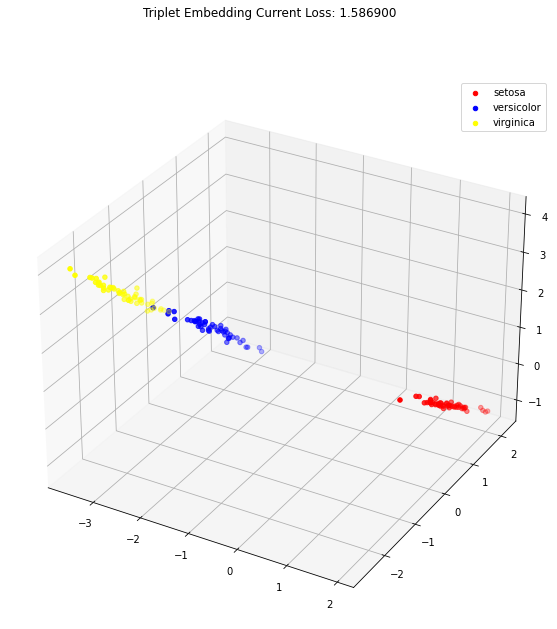

/home/smsm8898/libraries/anaconda3/envs/ms-tcn/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


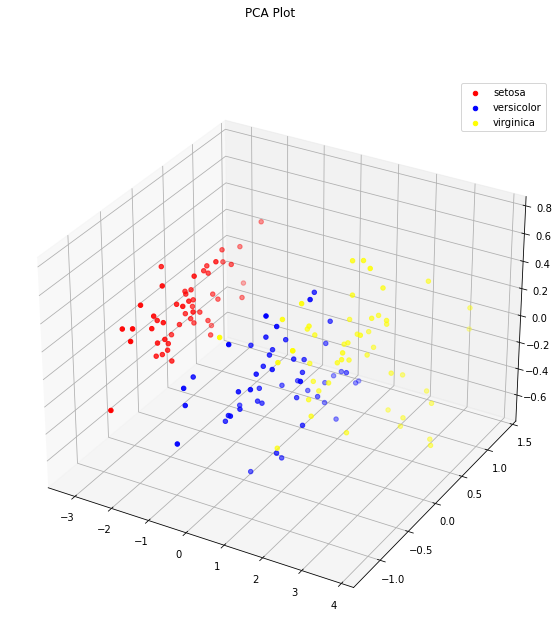

In [19]:
epochs = 100
iris = load_iris()
X = iris['data']
y = iris['target']
triplet_dataset = TripletDataset(X, y)
triplet_loader = DataLoader(triplet_dataset, batch_size = 1)

embedding_net = EmbeddingNet(4, 3)
triplet_model = TripletNet(embedding_net)



margin = 1
optimizer = optim.Adam(triplet_model.parameters(),lr=0.001)
triplet_loss = TripletLoss(margin)


for epoch in range(epochs):
    epoch_loss = 0
    
    for i, (a, p, n, label) in enumerate(triplet_loader):
        
        data = (
            a.squeeze().float(),
            p.squeeze().float(),
            n.squeeze().float()
        )
        
        optimizer.zero_grad()

        outputs = triplet_model(*data)
        
        loss = triplet_loss(*outputs)
        epoch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    print("[EPOCH: {}/{}] Loss {:.4f}".format(epoch+1, epochs, epoch_loss))
triplet_model.plot_embedding(X, epoch_loss)


from sklearn.decomposition import PCA
pca = PCA(3)
embeddings = pca.fit_transform(X)
fig = plt.figure(figsize=(10,10))
fig.suptitle("PCA Plot")
ax  = fig.add_subplot(projection='3d')

x = torch.tensor(x, dtype=torch.float32)

ax.scatter(
    embeddings[50*0:50*1,0],
    embeddings[50*0:50*1,1],
    embeddings[50*0:50*1,2],
    color='red',
    label='setosa'
)
ax.scatter(
    embeddings[50*1:50*2,0],
    embeddings[50*1:50*2,1],
    embeddings[50*1:50*2,2],
    color='blue',
    label='versicolor'
)
ax.scatter(
    embeddings[50*2:50*3,0],
    embeddings[50*2:50*3,1],
    embeddings[50*2:50*3,2],
    color='yellow',
    label='virginica'
)
ax.legend()
plt.show()
plt.close()

In [21]:
X = iris['data']
y = iris['target']
x = torch.tensor(X, dtype=torch.float32)

embeddings = triplet_model.get_embedding(x).detach().numpy()
X = embeddings
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

epochs=5
bs = 16

train = TensorDataset(x_train, y_train)
test  = TensorDataset(x_test, y_test)
train_loader  = DataLoader(train, batch_size=bs)
test_loader   = DataLoader(test, batch_size=bs)



model = Model(3)
    
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

model.train()
for epoch in range(epochs):
    epoch_loss = 0

    
    for x, y in train_loader:

        optimizer.zero_grad()

        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    print("EPOCH:{}/{} Loss: {:.4f}".format(epoch+1, epochs, epoch_loss))

    


y_pred = model(x_test)
prediction = torch.argmax(y_pred, 1)
correct = (prediction == y_test).sum().item()
acc = correct / len(y_test) * 100
print("\n\tAccuracy {:2.2f}%".format( acc))

EPOCH:1/5 Loss: 7.0797
EPOCH:2/5 Loss: 4.2408
EPOCH:3/5 Loss: 3.4285
EPOCH:4/5 Loss: 3.0994
EPOCH:5/5 Loss: 2.7000

	Accuracy 100.00%
